**Zadanie 1**  
Wczytaj plik¬†`zamowienia.csv`¬†do ramki pandas, a nastƒôpnie w kilku miejscach (ale nie w pierwszych 10 wierszach) wstaw warto≈õƒá NaN, aby zasymulowaƒá warto≈õci brakujƒÖce. Zapisz ramkƒô do pliku¬†`zamowienia_missing.csv`. Wczytaj teraz plik do ramki Dask i sprawd≈∫ jakie typy danych zosta≈Çy przydzielone. Czy zgadzajƒÖ siƒô z typami z oryginalnego pliku? Wykonaj dowolne obliczenia na ca≈Çej ramce Dask, aby wymusiƒá wywo≈Çanie¬†`.compute()`. Czy pojawi≈Ç siƒô b≈ÇƒÖd dotyczƒÖcy niesp√≥jno≈õci typ√≥w danych? Spr√≥buj uruchomiƒá kilka razy funkcjƒô wczytywania danych do ramki Dask dataframe z r√≥≈ºnymi warto≈õciami parametru¬†`samples`. Dokumentacja¬†`dask.dataframe.read_csv()`:¬†[https://docs.dask.org/en/stable/generated/dask.dataframe.read_csv.html](https://docs.dask.org/en/stable/generated/dask.dataframe.read_csv.html)

In [1]:
import pandas as pd
import numpy as np

zamowienia = pd.read_csv('zamowienia.csv')
# zamowienia.to_csv('zamowienia_missing.csv', index=False)

In [2]:
import dask.dataframe as dd

ddf = dd.read_csv('zamowienia_missing.csv', sep=';', assume_missing=True)
# ddf = dd.read_csv('zamowienia_missing.csv', sep=';')
print(ddf.dtypes)
ddf.compute()

Kraj               string[pyarrow]
Sprzedawca         string[pyarrow]
Data zamowienia    string[pyarrow]
idZamowienia               float64
Utarg                      float64
dtype: object


Kraj Sprzedawca Data zamowienia  idZamowienia    Utarg
0    Polska   Kowalski      2003-07-16       10248.0   440.00
1    Polska   Sowi≈Ñski      2003-07-10       10249.0  1863.40
2    Niemcy    Peacock      2003-07-12       10250.0  1552.60
3    Niemcy  Leverling      2003-07-15       10251.0   654.06
4    Niemcy    Peacock      2003-07-11       10252.0  3597.90
..      ...        ...             ...           ...      ...
794  Polska       King      2005-04-30       11048.0   525.00
795  Niemcy  Leverling      2005-05-01       11052.0  1332.00
796  Niemcy     Fuller      2005-04-29       11053.0  3055.00
797  Niemcy   Callahan      2005-05-01       11056.0  3740.00
798  Niemcy  Leverling      2005-05-01       11057.0    45.00

[799 rows x 5 columns]

In [3]:
ddf[ddf['Kraj'] == 'Polska']['Utarg'].sum().compute()

np.float64(332496.70999999996)

Samo `.compute()` podaje b≈ÇƒÖd ze wzglƒôdu na brakujƒÖce warto≈õci (je≈õli nie podamy `assume_missing=True`), w kolumnie `'Utarg'` r√≥wnie≈º sƒÖ warto≈õci NaN.

In [4]:
# samples
ddf_sampled = dd.read_csv('zamowienia_missing.csv', assume_missing=True, sep=';', sample=1024)
ddf_sampled[ddf_sampled['Kraj'] == 'Polska']['Utarg'].sum().compute()

np.float64(332496.70999999996)

In [5]:
ddf_sampled = dd.read_csv('zamowienia_missing.csv', assume_missing=True, sep=';', sample=4096)
ddf_sampled[ddf_sampled['Kraj'] == 'Polska']['Utarg'].sum().compute()

np.float64(332496.70999999996)

In [6]:
ddf_sampled = dd.read_csv('zamowienia_missing.csv', assume_missing=True, sep=';', sample=64)
ddf_sampled[ddf_sampled['Kraj'] == 'Polska']['Utarg'].sum().compute()

np.float64(332496.70999999996)

**Zadanie 2**  
Ze strony¬†[https://docs.dask.org/en/stable/dashboard.html](https://docs.dask.org/en/stable/dashboard.html)¬†skonfiguruj plugin Dask dashboard dla Jupyter Lab i przetestuj jego dzia≈Çanie.

In [7]:
from dask.distributed import Client
client = Client()
client

In [8]:
import dask.array as da

# przetestuj dzia≈Çanie
x = da.random.random((10000, 10000, 10), chunks=(1000, 1000, 5))
y = da.random.random((10000, 10000, 10), chunks=(1000, 1000, 5))
z = (da.arcsin(x) + da.arccos(y)).sum(axis=(1,2))
z.compute()

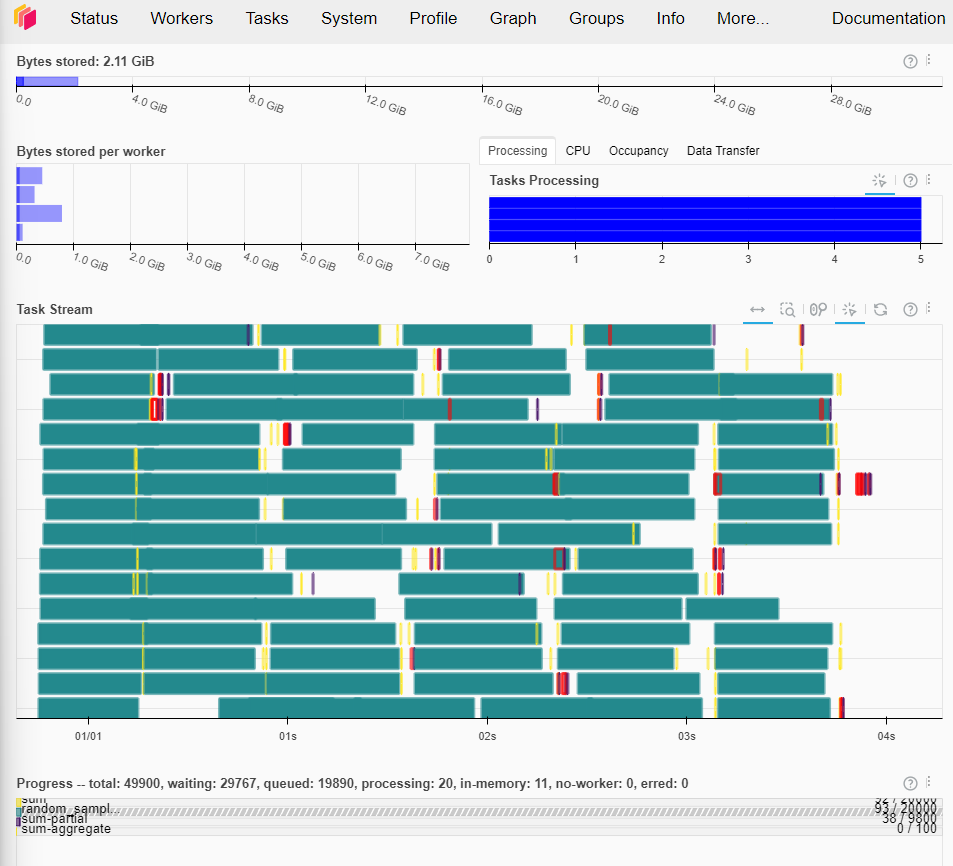

**Zadanie 3**  
Skonfiguruj lokalny klaster (`Client`) tak, aby nie zaalokowa≈Ç wszystkich zasob√≥w (np. zostaw 8 GB RAM dla systemu hosta + 2 rdzenie). Pobierz dane udostƒôpnione na poprzednich zajƒôciach ([https://huggingface.co/datasets/vargr/private_instagram/tree/main/data](https://huggingface.co/datasets/vargr/private_instagram/tree/main/data)) i za≈Çaduj do ramki Dask tyle czƒô≈õci ile zdo≈Çasz w formie bez optymalizacji. Zmierz czas tej operacji.

In [2]:
import time
import dask.dataframe as dd
from dask.distributed import Client

client = Client(n_workers=2, threads_per_worker=2, memory_limit='28GB')
client

start_time = time.time()
ddf_insta = dd.read_parquet('../*.parquet')
ddf_insta.compute()
end_time = time.time()
print(f"Czas ≈Çadowania danych: {end_time - start_time} sekund")


Czas ≈Çadowania danych: 136.9166660308838 sekund


**Zadanie 4**  
Wykonaj kilka operacji na klastrze lokalnym z danymi z zadania 3:

- wy≈õwietl top 10 u≈ºytkownik√≥w z najwy≈ºszƒÖ liczbƒÖ like'√≥w,
- pobierz dane tylko za pierwsze p√≥≈Çrocze 2019 roku. Ka≈ºdorazowo zmierz i wy≈õwietl czas operacji i obserwuj dashboard.

In [1]:
import dask.dataframe as dd
from dask.distributed import Client
import time

client = Client(n_workers=2, threads_per_worker=2, memory_limit='28GB')
client

ddf = dd.read_parquet('../*.parquet')

# top 10
start_time = time.time()
top_10_users = ddf.groupby('username')['likes'].sum().nlargest(10).compute()
end_time = time.time()
print(f"Top 10 users w/ highest likes:\n{top_10_users}")
print(f"Time: {end_time - start_time} seconds")

# half of 2019
start_time = time.time()
ddf['date'] = dd.to_datetime(ddf['date'])
first_half_2019 = ddf[(ddf['date'] >= '2019-01-01') & (ddf['date'] <= '2019-06-30')].compute()
end_time = time.time()
print(f"First half of 2019:\n{first_half_2019}")
print(f"Time: {end_time - start_time} seconds")


Top 10 users w/ highest likes:
username
lilireinhart     40375292
instagram        29864166
jamescharles     26067462
lizakoshy        19217644
elle             17494288
433              16457870
amandacerny      15019135
saraalikhan95    14199489
zkdlin           13799100
akshaykumar      13352324
Name: likes, dtype: int64
Time: 4.041318893432617 seconds
First half of 2019:
              sid  sid_profile      post_id  profile_id                date  \
2        28370905      3496776  Bunhd1DFVAG  2237947779 2019-03-05 08:03:11   
4        32170690      3496776  BuDfIyslzfw  2237947779 2019-02-19 08:10:11   
5        14315358      3496776  BxJsMDpA2yH  2237947779 2019-05-07 08:33:51   
6         8304346      3496776  Bt5LFpZlm3z  2237947779 2019-02-15 08:02:35   
7        14315346      3496776  BxZIzaQhS-o  2237947779 2019-05-13 08:32:30   
...           ...          ...          ...         ...                 ...   
1147349  28364854      1313976  Bt4CYsJFHo0   360287303 2019-02-14 21

**Zadanie 5**  
Wczytaj te same dane do ramki Dask co w zadaniu 3, ale podaj typy danych, kt√≥re zosta≈Çy wybrane w procesie optymalizacji wykonanej w zadaniach z lab 01. Por√≥wnaj czas ≈Çadowania z zadaniem 3. Wykonaj r√≥wnie≈º te same operacje co w zadaniu 4 i por√≥wnaj czas. ≈öled≈∫ wykonanie zada≈Ñ patrzƒÖc na graf wywo≈Ça≈Ñ.

In [1]:
import dask.dataframe as dd
from dask.distributed import Client
import numpy as np
import time
import pandas as pd

client = Client(n_workers=3, threads_per_worker=2, memory_limit='28GB')
client

dtype_opt = {
    'sid': np.int32,
    'post_id': 'category',
    'profile_id': 'category',
    'post_type': 'category',
    'description': 'str',
    'likes': np.int32,
    'comments': np.int32,
    'username': 'category',
    'bio': 'str',
    'followers': np.int32,
    'following': np.int32,
    'num_posts': np.int32,
    'lang': 'category',
    'category': 'category'
}

start_time = time.time()
ddf_optimized = dd.read_parquet('../*.parquet', dtype=dtype_opt)
ddf_optimized['date'] = dd.to_datetime(ddf_optimized['date'])
ddf_optimized.compute()
end_time = time.time()
print(f"Czas ≈Çadowania danych opt: {end_time - start_time} sekund")

start_time = time.time()
top_10_users_opt = ddf_optimized.groupby('username')['likes'].sum().nlargest(10).compute()
end_time = time.time()
print(f"Time for top 10 opt: {end_time - start_time} seconds")

start_time = time.time()
first_half_2019_opt = ddf_optimized[(ddf_optimized['date'] >= '2019-01-01') & (ddf_optimized['date'] <= '2019-06-30')].compute()
end_time = time.time()
print(f"Time for first half opt: {end_time - start_time} seconds")

Czas ≈Çadowania danych opt: 139.645592212677 sekund
Time for top 10 opt: 4.895451307296753 seconds
Time for first half opt: 38.71882891654968 seconds


**Zadanie 6**  
Podziel tablicƒô¬†`darr`¬†z przyk≈Çad√≥w na inne liczby chunk√≥w (eksperymentuj) i wykonaj te same obliczenie (≈õrednia). Dla ka≈ºdej liczby chunk√≥w wypisz czas oblicze≈Ñ (wykonaj to samo obliczenie minimum 10 razy, aby nieco uwiarygodniƒá wyniki i u≈õrednij) i por√≥wnaj wyniki. Napisz wniosek o wynikach swoich eksperyment√≥w i automatycznego podzia≈Çu na chunki. Czy uda≈Ço Ci siƒô osiƒÖgnƒÖƒá lepszƒÖ wydajno≈õƒá ni≈º przy domy≈õlnych ustawieniach?

In [1]:
import dask.array as da
import time
import numpy as np
from dask.distributed import Client

client = Client(n_workers=4, threads_per_worker=2, memory_limit='24GB')
client

def measure_time_for_mean(darr, repeats=10):
    times = []
    for _ in range(repeats):
        start_time = time.time()
        darr.mean(axis=0).compute()
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times)

size = (20_000, 20_000)
chunk_sizes = [(2000, 2000), (4000, 4000), (5000, 5000), (10000, 10000), (20000, 20000)]
results = {}

for chunk in chunk_sizes:
    darr = da.random.normal(5, 0.2, size=size, chunks=chunk)
    avg_time = measure_time_for_mean(darr, repeats=10)
    results[chunk] = avg_time

# domy≈õlne
darr_auto = da.random.normal(5, 0.2, size=size)
auto_time = measure_time_for_mean(darr_auto, repeats=10)
results['auto'] = auto_time

print("\nPor√≥wnanie:")
for chunk, avg_time in results.items():
    print(f"Chunks {chunk}: {avg_time:.4f} seconds")



Por√≥wnanie:
Chunks (2000, 2000): 1.3769 seconds
Chunks (4000, 4000): 1.3722 seconds
Chunks (5000, 5000): 1.1790 seconds
Chunks (10000, 10000): 1.6725 seconds
Chunks (20000, 20000): 4.5230 seconds
Chunks auto: 1.3215 seconds


In [2]:
overall_avg = 0
for chunk, avg_time in results.items():
    if chunk != 'auto':
        overall_avg += avg_time

print(f"Overall avg: {overall_avg/5:.4f} seconds")

Overall avg: 2.0247 seconds


Zbyt du≈ºe chunki zdecydowanie wykorzystywa≈Çy zbyt du≈ºo pamiƒôci na pojedyncze zadania - stƒÖd wy≈ºszy czas. W teorii mniejsze chunki to r√≥wnie≈º problem - komunikacja miƒôdzy workerami czasami pada, ale akurat tutaj zda≈Çy siƒô w miarƒô dobrze. Najlepszy by≈Ç podzia≈Ç na *4 czƒô≈õci - 5k wieloko≈õci chunka*. Czas auto jest ni≈ºszy ni≈º og√≥lna ≈õrednia, ale dopasowanie indywidualne pozwala na lepsze wyniki.